# data reading/ understanding

In [10]:
import os

# Assuming your dataset is mounted in Google Colab under '/content/drive/My Drive/...'
# Change the base directory to where you have stored the dataset.
base_dir = r"C:\Users\tejag\Downloads\PGP\Cancer detection assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration"

train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

# Listing subdirectories in train directory
train_subdirs = [os.path.join(train_dir, o) for o in os.listdir(train_dir) 
                 if os.path.isdir(os.path.join(train_dir, o))]

# Listing subdirectories in test directory
test_subdirs = [os.path.join(test_dir, o) for o in os.listdir(test_dir) 
                if os.path.isdir(os.path.join(test_dir, o))]

print("Training subdirectories:")
print(train_subdirs)
print("\nTesting subdirectories:")
print(test_subdirs)


Training subdirectories:
['C:\\Users\\tejag\\Downloads\\PGP\\Cancer detection assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis', 'C:\\Users\\tejag\\Downloads\\PGP\\Cancer detection assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma', 'C:\\Users\\tejag\\Downloads\\PGP\\Cancer detection assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma', 'C:\\Users\\tejag\\Downloads\\PGP\\Cancer detection assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma', 'C:\\Users\\tejag\\Downloads\\PGP\\Cancer detection assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\nevus', 'C:\\Users\\tejag\\Downloads\\PGP\\Cancer detection assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Tr

# data set creation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% of data will be used for validation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')  # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir,  # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  # set as validation data


Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


# dataset visualization

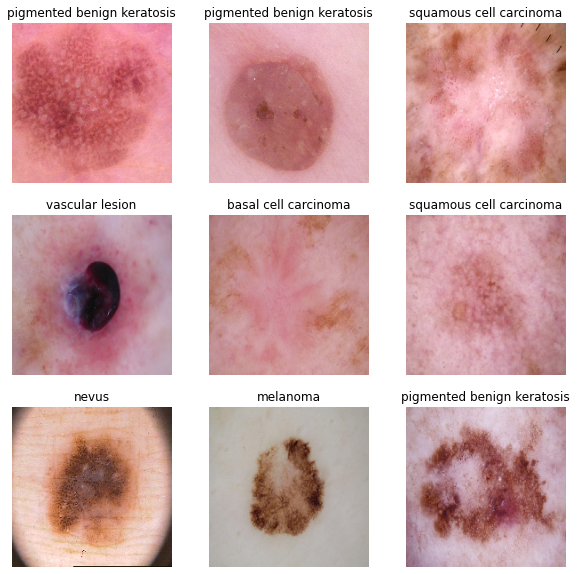

In [13]:
import matplotlib.pyplot as plt

def show_images(images, labels, classes):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(classes[labels[i].argmax()])
        plt.axis("off")

# Fetch batch of images
images, labels = next(train_generator)

# Get class names
class_names = list(train_generator.class_indices.keys())

# Display images
show_images(images, labels, class_names)


# model building and training

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = len(train_generator.class_indices)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 20, 20, 128)     

# compile the model with an appropriate optimizer and loss function:

In [15]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\tejag\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# train the model using the train and validation generators:

In [16]:
epochs = 20

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20
56/56 [==============================] - 66s 1s/step - loss: 2.0920 - accuracy: 0.2201 - val_loss: 1.8513 - val_accuracy: 0.3053
Epoch 2/20
56/56 [==============================] - 79s 1s/step - loss: 1.8010 - accuracy: 0.3590 - val_loss: 1.7625 - val_accuracy: 0.3534
Epoch 3/20
56/56 [==============================] - 83s 1s/step - loss: 1.6182 - accuracy: 0.4515 - val_loss: 1.9613 - val_accuracy: 0.4062
Epoch 4/20
56/56 [==============================] - 73s 1s/step - loss: 1.5394 - accuracy: 0.4611 - val_loss: 1.7181 - val_accuracy: 0.4736
Epoch 5/20
56/56 [==============================] - 76s 1s/step - loss: 1.4515 - accuracy: 0.5054 - val_loss: 1.7409 - val_accuracy: 0.4399
Epoch 6/20
56/56 [==============================] - 69s 1s/step - loss: 1.4335 - accuracy: 0.5082 - val_loss: 1.6603 - val_accuracy: 0.4543
Epoch 7/20
56/56 [==============================] - 64s 1s/step - loss: 1.2886 - accuracy: 0.5559 - val_loss: 1.8659 - val_accuracy: 0.4135
Epoch 8/20
56/56 [==

# examine the history to look for signs of overfitting or underfitting:

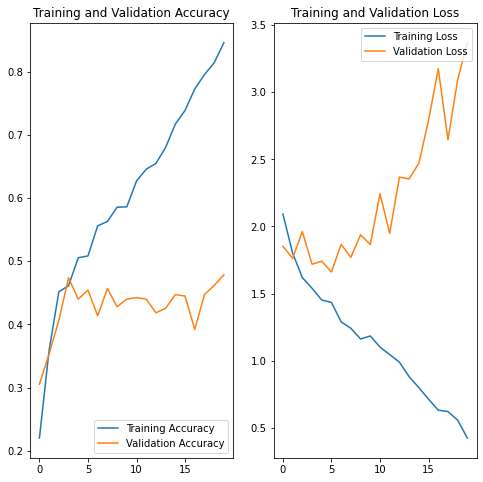

In [17]:
# Plot the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# data augmentation

In [18]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

# Use the same generator for training - but now with augmentation
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

# Validation generator remains the same

Found 1795 images belonging to 9 classes.


# it looks like your model is experiencing high variance, which is a sign of overfitting

 # incorporate dropout and regularization into your model

In [19]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Dropout(0.3),  # Dropout layer
    
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Dropout(0.3),  # Dropout layer
    
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Dropout(0.4),  # Increase dropout for deeper layers
    
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(lr=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Re-train the model with the same fitting procedure


# retraining model with these adjustments

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Add the callback to the fit function
history = model.fit(
    train_generator_augmented,
    steps_per_epoch=train_generator_augmented.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/20
56/56 [==============================] - 92s 2s/step - loss: 3.3069 - accuracy: 0.1900 - val_loss: 2.8844 - val_accuracy: 0.2091
Epoch 2/20
56/56 [==============================] - 106s 2s/step - loss: 2.6710 - accuracy: 0.2235 - val_loss: 2.5631 - val_accuracy: 0.2019
Epoch 3/20
56/56 [==============================] - 105s 2s/step - loss: 2.4144 - accuracy: 0.2842 - val_loss: 2.3400 - val_accuracy: 0.2668
Epoch 4/20
56/56 [==============================] - 112s 2s/step - loss: 2.1639 - accuracy: 0.3585 - val_loss: 2.1397 - val_accuracy: 0.3173
Epoch 5/20
56/56 [==============================] - 109s 2s/step - loss: 1.9850 - accuracy: 0.3953 - val_loss: 2.0985 - val_accuracy: 0.3269
Epoch 6/20
56/56 [==============================] - 114s 2s/step - loss: 1.9272 - accuracy: 0.4090 - val_loss: 2.0395 - val_accuracy: 0.3774
Epoch 7/20
56/56 [==============================] - 137s 2s/step - loss: 1.8581 - accuracy: 0.4197 - val_loss: 2.0414 - val_accuracy: 0.3702
Epoch 8/20
56/

#  plot the new training and validation accuracy

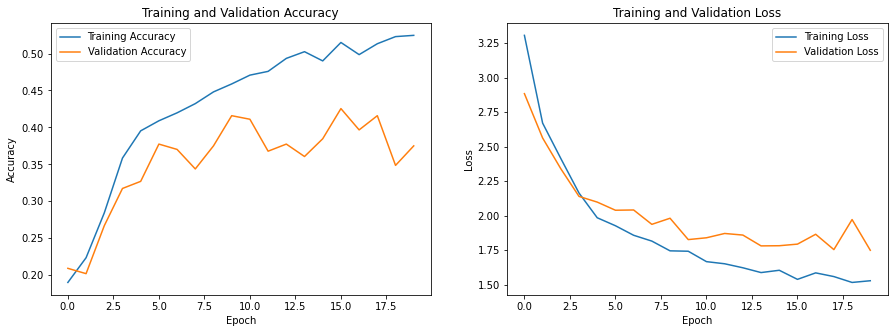

In [22]:
# Plot the training history
new_acc = history.history['accuracy']
new_val_acc = history.history['val_accuracy']
new_loss = history.history['loss']
new_val_loss = history.history['val_loss']

epochs_range = range(len(new_acc))  # this accounts for early stopping

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, new_acc, label='Training Accuracy')
plt.plot(epochs_range, new_val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, new_loss, label='Training Loss')
plt.plot(epochs_range, new_val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# To evaluate the final accuracy of the trained model on unseen data, evaluate method on the test set

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Found 118 images belonging to 9 classes.
4/4 [==============================] - 9s 3s/step - loss: 2.2326 - accuracy: 0.3220
Test accuracy: 32.20%


In [25]:
# If you have a separate test generator:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

4/4 [==============================] - 8s 2s/step - loss: 2.2326 - accuracy: 0.3220
Test accuracy: 32.20%


#  implement class weights to help with class imbalance

In [27]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class labels from the generator
class_labels = train_generator.classes

# Get the class indices
class_labels_indices = train_generator.class_indices

# Calculate the class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_labels),
    y=class_labels
)

# Create a dictionary mapping the class indices to the weights
class_weights_dict = dict(enumerate(class_weights))

print(class_weights_dict)


{0: 2.167874396135266, 1: 0.6626061277224068, 2: 2.624269005847953, 3: 0.5682177904400126, 4: 0.6973581973581974, 5: 0.539039039039039, 6: 3.216845878136201, 7: 1.3754789272030652, 8: 1.7807539682539681}


In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weights_dict
)


Epoch 1/20
56/56 [==============================] - 85s 2s/step - loss: 1.6949 - accuracy: 0.4192 - val_loss: 1.9549 - val_accuracy: 0.3413
Epoch 2/20
56/56 [==============================] - 95s 2s/step - loss: 1.6132 - accuracy: 0.4464 - val_loss: 1.9330 - val_accuracy: 0.3846
Epoch 3/20
56/56 [==============================] - 94s 2s/step - loss: 1.6256 - accuracy: 0.4543 - val_loss: 1.8628 - val_accuracy: 0.4303
Epoch 4/20
56/56 [==============================] - 110s 2s/step - loss: 1.5396 - accuracy: 0.4702 - val_loss: 1.8165 - val_accuracy: 0.4303
Epoch 5/20
56/56 [==============================] - 104s 2s/step - loss: 1.5231 - accuracy: 0.4770 - val_loss: 1.8222 - val_accuracy: 0.4423
Epoch 6/20
56/56 [==============================] - 103s 2s/step - loss: 1.4957 - accuracy: 0.4487 - val_loss: 1.8883 - val_accuracy: 0.4255
Epoch 7/20
56/56 [==============================] - 112s 2s/step - loss: 1.4938 - accuracy: 0.4583 - val_loss: 1.7318 - val_accuracy: 0.4976
Epoch 8/20
56/56

# model performance

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true class labels
true_classes = test_generator.classes

# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Classification Report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


4/4 [==============================] - 9s 3s/step
Confusion Matrix:
[[ 9  0  0  0  1  2  1  3  0]
 [ 3  3  3  1  0  2  0  4  0]
 [ 3  2  3  3  2  1  0  2  0]
 [ 0  0  0  1  6  9  0  0  0]
 [ 0  0  0  1 11  4  0  0  0]
 [ 3  1  0  0  1  8  0  3  0]
 [ 0  0  0  1  0  0  1  1  0]
 [ 1  3  2  0  4  2  0  3  1]
 [ 1  0  0  0  0  0  0  0  2]]

Classification Report:
                            precision    recall  f1-score   support

         actinic keratosis       0.45      0.56      0.50        16
      basal cell carcinoma       0.33      0.19      0.24        16
            dermatofibroma       0.38      0.19      0.25        16
                  melanoma       0.14      0.06      0.09        16
                     nevus       0.44      0.69      0.54        16
pigmented benign keratosis       0.29      0.50      0.36        16
      seborrheic keratosis       0.50      0.33      0.40         3
   squamous cell carcinoma       0.19      0.19      0.19        16
           vascular lesi